In [87]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

In [88]:
# Loading in the cleaned DF
with open("./profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df

,Name,Bios,Languages,Music,Cuisine,Arts,History
0,Raul Boone,Award-winning pop culture junkie. Unapologetic food aficionado. Proud social mediaholic.,3,1,6,7,2
1,Claudia King,Coffee junkie. Freelance bacon scholar. Avid organizer. Gamer. Zombie maven. Proud entrepreneur. Twitter expert.,4,9,9,3,0
2,Michelle Castro,Coffee lover. Food junkie. Writer. Beer trailblazer. Hipster-friendly alcohol guru. Internet fan.,2,2,1,1,2
3,Shelly Holloway,Tv guru. Zombie advocate. Web fan. Certified beer maven. Proud reader. Alcohol aficionado. Award-winning entrepreneur.,1,4,4,7,1
4,Travis Rios,Hardcore communicator. Lifelong twitter specialist. Internet evangelist. Professional foodaholic.,1,4,0,5,6
...,...,...,...,...,...,...,...
145,Teodoro Newkirk,Unapologetic creator. Coffee geek. Hipster-friendly thinker. Lifelong entrepreneur. Incurable pop culture fanatic.,8,7,6,2,3
146,Willy Nye,Beer enthusiast. Tv nerd. Coffee specialist. Internet aficionado. Friendly bacon fan. Proud creator.,7,3,4,7,4
147,Deeann Rizzo,Music ninja. Entrepreneur. Typical reader. Travel maven. Hardcore explorer. Beer fanatic. Wannabe tv nerd. Creator. Web trailblazer.,7,4,0,8,8
148,Amina Cone,Alcohol aficionado. Passionate tv ninja. Evil coffee nerd. Amateur music specialist.,2,9,5,0,2


In [89]:
del df['Name']

In [90]:
# Instantiating the Scaler
scaler = MinMaxScaler()

# Scaling the categories then replacing the old values
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Languages,Music,Cuisine,Arts,History
0,Award-winning pop culture junkie. Unapologetic food aficionado. Proud social mediaholic.,0.333333,0.111111,0.666667,0.777778,0.222222
1,Coffee junkie. Freelance bacon scholar. Avid organizer. Gamer. Zombie maven. Proud entrepreneur. Twitter expert.,0.444444,1.000000,1.000000,0.333333,0.000000
2,Coffee lover. Food junkie. Writer. Beer trailblazer. Hipster-friendly alcohol guru. Internet fan.,0.222222,0.222222,0.111111,0.111111,0.222222
3,Tv guru. Zombie advocate. Web fan. Certified beer maven. Proud reader. Alcohol aficionado. Award-winning entrepreneur.,0.111111,0.444444,0.444444,0.777778,0.111111
4,Hardcore communicator. Lifelong twitter specialist. Internet evangelist. Professional foodaholic.,0.111111,0.444444,0.000000,0.555556,0.666667
...,...,...,...,...,...,...
145,Unapologetic creator. Coffee geek. Hipster-friendly thinker. Lifelong entrepreneur. Incurable pop culture fanatic.,0.888889,0.777778,0.666667,0.222222,0.333333
146,Beer enthusiast. Tv nerd. Coffee specialist. Internet aficionado. Friendly bacon fan. Proud creator.,0.777778,0.333333,0.444444,0.777778,0.444444
147,Music ninja. Entrepreneur. Typical reader. Travel maven. Hardcore explorer. Beer fanatic. Wannabe tv nerd. Creator. Web trailblazer.,0.777778,0.444444,0.000000,0.888889,0.888889
148,Alcohol aficionado. Passionate tv ninja. Evil coffee nerd. Amateur music specialist.,0.222222,1.000000,0.555556,0.000000,0.222222


In [91]:
nameslist = [
"Raul Boone",
"Claudia King",
"Michelle Castro",
"Shelly Holloway",
"Travis Rios",
"Mark Owens",
"Grant Casey",
"Desiree Jones",
"Gene Holt",
"Regina Stone",
"Nichole Campbell",
"Terry Bennett",
"Myron Harrington",
"Joyce Luna",
"Ivan Graham",
"Jean Montgomery",
"Yvette Simon",
"Jan Herrera",
"Nancy Jenkins",
"Justin Soto",
"Edwin Simmons",
"Devin Chapman",
"Blanche Hanson",
"Catherine Cannon",
"Alfonso Nunez",
"Dustin Lindsey",
"Kristina Newton",
"Hattie Ortiz",
"Patsy Malone",
"Vickie Lyons",
"Teresa Delgado",
"Jonathon Drake",
"Donna Pearson",
"Elizabeth May",
"Sammy Griffith",
"Cary Williamson",
"Kevin Cunningham",
"Vicki Henry",
"Antonio Greene",
"Eduardo Barber",
"Saul Manning",
"Gayle Dawson",
"Rosemarie Reyes",
"Angelina Pena",
"Rene Ellis",
"Ramiro George",
"Debbie Blair",
"Phillip Maldonado",
"Priscilla Santiago",
"Monica Mccormick",
"Colleen Holland",
"Neal Byrd",
"Jean James",
"Ricardo Cobb",
"Karl Perez",
"Constance Buchanan",
"Estelle Cook",
"Kim Bell",
"Harry Hudson",
"Thelma Parks",
"Miranda Ortega",
"Jenna Lambert",
"Myrtle Armstrong",
"Laura Smith",
"Natalie French",
"Leo Sherman",
"Betty Bush",
"Johnnie Phillips",
"Orlando Austin",
"Noel Freeman",
"Mitchell Moreno",
"Shannon Mckinney",
"Terrence Mclaughlin",
"Danny Anderson",
"Virgil Woods",
"Bradford Fuller",
"Domingo Ferguson",
"Blake Thomas",
"Greg Yates",
"Carl Vasquez",
"Daisy Lynch",
"Robin Bradley",
"Rebecca Roberson",
"Kyle Morales",
"Omar Sanders",
"Kristine Strickland",
"Cassandra Singleton",
"Iris Brady",
"Melba Hunter",
"Luis Moran",
"Lance Gill",
"Erika Hamilton",
"Clifton Stevens",
"Shelley Ward",
"John Caldwell",
"Cesar White",
"Helen Walsh",
"Jane Bailey",
"Jackie Jimenez",
"Roger Rodriguez",
"Karoline Payton",
"Wyatt Apodaca",
"Hulda Gurley",
"Steffanie Bunnell",
"Rosalva Forrest",
"Leisa Butterfield",
"Brooks Mclemore",
"Angla Parrott",
"Carisa Bronson",
"Rubi Whyte",
"Eusebia Rauch",
"Gale Elliot",
"Latoyia Connelly",
"Shelli Shade",
"Dorthea Cabral",
"Dennise Seifert",
"Jesusita Atkinson",
"Kyra Snodgrass",
"Rosalia Evers",
"Janine Stroud",
"Yon Legg",
"Loree Hartwell",
"Arlena Coombs",
"Keri Parra",
"Izola Ebert",
"Micheline Serrano",
"Sindy Waddell",
"Christinia Neel",
"Lucio Delgadillo",
"Whitley Colvin",
"Miles Baumgartner",
"Joselyn Leon",
"Odilia Grubbs",
"Loyd Soliz",
"Trista Brogan",
"Alona Goddard",
"Romana Dougherty",
"Ping Nutt",
"Alyce Schrader",
"Angelika Block",
"Marni Squires",
"Marleen Cavanaugh",
"Sacha Alley",
"Sheena Elmore",
"Iliana See",
"Teodoro Newkirk",
"Willy Nye",
"Deeann Rizzo",
"Amina Cone",
"Tabatha Milne"             
]

In [92]:
names_df = pd.DataFrame(nameslist, columns=['Name'])

In [93]:
# # Joining the two dataframes
# df = names_df.join(df)
# df

In [94]:
vectorizer = CountVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])

In [95]:
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_wrds

,advocate,aficionado,alcohol,amateur,analyst,animals,apathy,avid,award,bacon,...,tv,twitter,twitteraholic,typical,unapologetic,wannabe,web,winning,writer,zombie
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
146,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,0
148,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [96]:
# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop(['Bios'], axis=1, inplace=True)

# Viewing the new DF
new_df

,Languages,Music,Cuisine,Arts,History,advocate,aficionado,alcohol,amateur,analyst,...,tv,twitter,twitteraholic,typical,unapologetic,wannabe,web,winning,writer,zombie
0,0.333333,0.111111,0.666667,0.777778,0.222222,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0.444444,1.000000,1.000000,0.333333,0.000000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0.222222,0.222222,0.111111,0.111111,0.222222,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.111111,0.444444,0.444444,0.777778,0.111111,1,1,1,0,0,...,1,0,0,0,0,0,1,1,0,1
4,0.111111,0.444444,0.000000,0.555556,0.666667,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.888889,0.777778,0.666667,0.222222,0.333333,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
146,0.777778,0.333333,0.444444,0.777778,0.444444,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
147,0.777778,0.444444,0.000000,0.888889,0.888889,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,0
148,0.222222,1.000000,0.555556,0.000000,0.222222,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0


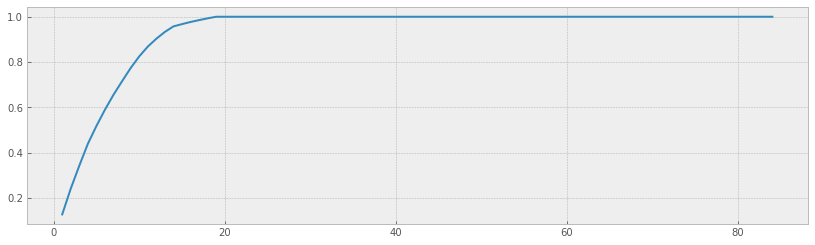

Number features: 17
Total Variance Explained: 0.9929981731311857


In [97]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_99 = new_df.shape[1] - n_over_99

print(f"Number features: {n_to_reach_99}\nTotal Variance Explained: {total_explained_variance[n_to_reach_99]}")

In [98]:
# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_99)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

0.9851501195068667

In [99]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in tqdm(cluster_cnt):
    
    # Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

<ipython-input-99-936ae0276ffe>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(cluster_cnt):


In [100]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

Max Value:
Cluster #     Cluster Score
15     321.930223

Min Value:
Cluster #    Cluster Score
2      18.126026


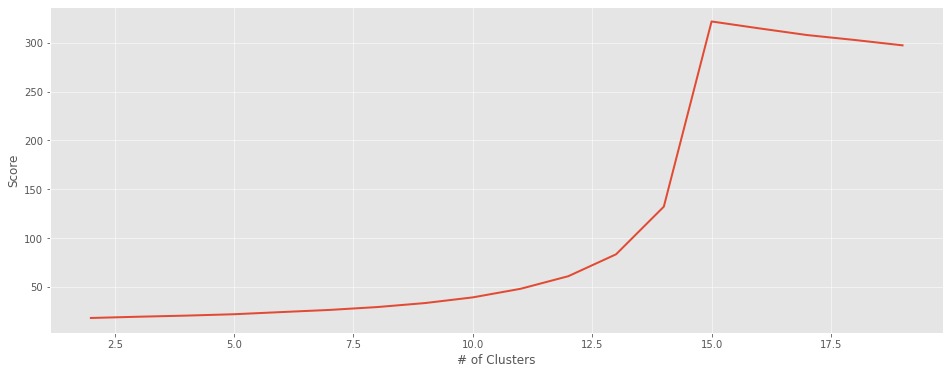

In [101]:
plot_evaluation(ch_scores)

Max Value:
Cluster #     Cluster Score
15       0.814932

Min Value:
Cluster #    Cluster Score
2       0.164023


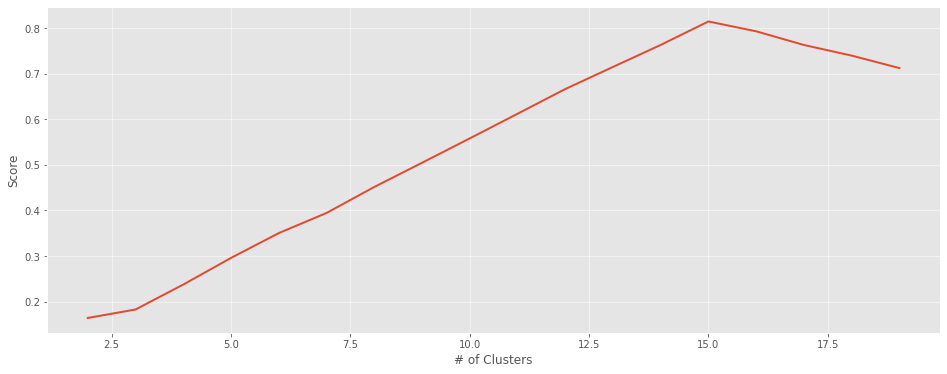

In [102]:
plot_evaluation(s_scores)

Max Value:
Cluster #    Cluster Score
3       2.241454

Min Value:
Cluster #     Cluster Score
15       0.265681


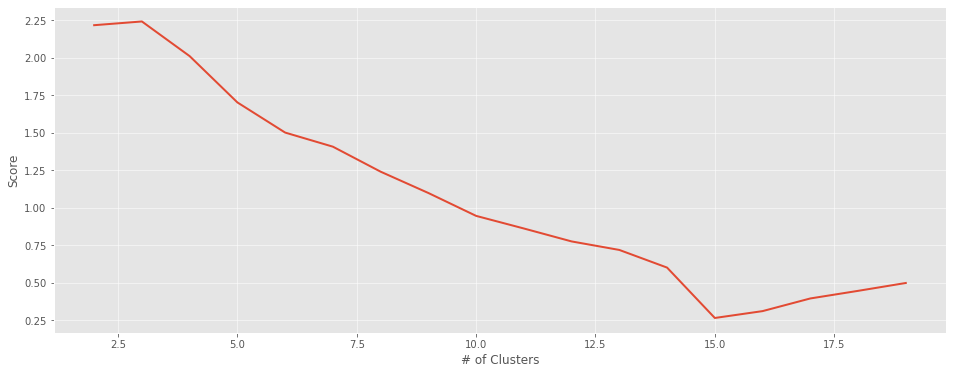

In [103]:
plot_evaluation(db_scores)

In [104]:
hac = AgglomerativeClustering(n_clusters=12)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

In [105]:
# Unscaling the categories then replacing the scaled values
df = df[['Bios']].join(pd.DataFrame(scaler.inverse_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Languages,Music,Cuisine,Arts,History
0,Award-winning pop culture junkie. Unapologetic food aficionado. Proud social mediaholic.,3.0,1.0,6.0,7.0,2.0
1,Coffee junkie. Freelance bacon scholar. Avid organizer. Gamer. Zombie maven. Proud entrepreneur. Twitter expert.,4.0,9.0,9.0,3.0,0.0
2,Coffee lover. Food junkie. Writer. Beer trailblazer. Hipster-friendly alcohol guru. Internet fan.,2.0,2.0,1.0,1.0,2.0
3,Tv guru. Zombie advocate. Web fan. Certified beer maven. Proud reader. Alcohol aficionado. Award-winning entrepreneur.,1.0,4.0,4.0,7.0,1.0
4,Hardcore communicator. Lifelong twitter specialist. Internet evangelist. Professional foodaholic.,1.0,4.0,0.0,5.0,6.0
...,...,...,...,...,...,...
145,Unapologetic creator. Coffee geek. Hipster-friendly thinker. Lifelong entrepreneur. Incurable pop culture fanatic.,8.0,7.0,6.0,2.0,3.0
146,Beer enthusiast. Tv nerd. Coffee specialist. Internet aficionado. Friendly bacon fan. Proud creator.,7.0,3.0,4.0,7.0,4.0
147,Music ninja. Entrepreneur. Typical reader. Travel maven. Hardcore explorer. Beer fanatic. Wannabe tv nerd. Creator. Web trailblazer.,7.0,4.0,0.0,8.0,8.0
148,Alcohol aficionado. Passionate tv ninja. Evil coffee nerd. Amateur music specialist.,2.0,9.0,5.0,0.0,2.0


In [106]:
# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df

,Bios,Languages,Music,Cuisine,Arts,History,Cluster #
0,Award-winning pop culture junkie. Unapologetic food aficionado. Proud social mediaholic.,3.0,1.0,6.0,7.0,2.0,3
1,Coffee junkie. Freelance bacon scholar. Avid organizer. Gamer. Zombie maven. Proud entrepreneur. Twitter expert.,4.0,9.0,9.0,3.0,0.0,8
2,Coffee lover. Food junkie. Writer. Beer trailblazer. Hipster-friendly alcohol guru. Internet fan.,2.0,2.0,1.0,1.0,2.0,1
3,Tv guru. Zombie advocate. Web fan. Certified beer maven. Proud reader. Alcohol aficionado. Award-winning entrepreneur.,1.0,4.0,4.0,7.0,1.0,5
4,Hardcore communicator. Lifelong twitter specialist. Internet evangelist. Professional foodaholic.,1.0,4.0,0.0,5.0,6.0,0
...,...,...,...,...,...,...,...
145,Unapologetic creator. Coffee geek. Hipster-friendly thinker. Lifelong entrepreneur. Incurable pop culture fanatic.,8.0,7.0,6.0,2.0,3.0,10
146,Beer enthusiast. Tv nerd. Coffee specialist. Internet aficionado. Friendly bacon fan. Proud creator.,7.0,3.0,4.0,7.0,4.0,2
147,Music ninja. Entrepreneur. Typical reader. Travel maven. Hardcore explorer. Beer fanatic. Wannabe tv nerd. Creator. Web trailblazer.,7.0,4.0,0.0,8.0,8.0,7
148,Alcohol aficionado. Passionate tv ninja. Evil coffee nerd. Amateur music specialist.,2.0,9.0,5.0,0.0,2.0,2


In [107]:
# Joining the two dataframes
df = names_df.join(df)
df

,Name,Bios,Languages,Music,Cuisine,Arts,History,Cluster #
0,Raul Boone,Award-winning pop culture junkie. Unapologetic food aficionado. Proud social mediaholic.,3.0,1.0,6.0,7.0,2.0,3
1,Claudia King,Coffee junkie. Freelance bacon scholar. Avid organizer. Gamer. Zombie maven. Proud entrepreneur. Twitter expert.,4.0,9.0,9.0,3.0,0.0,8
2,Michelle Castro,Coffee lover. Food junkie. Writer. Beer trailblazer. Hipster-friendly alcohol guru. Internet fan.,2.0,2.0,1.0,1.0,2.0,1
3,Shelly Holloway,Tv guru. Zombie advocate. Web fan. Certified beer maven. Proud reader. Alcohol aficionado. Award-winning entrepreneur.,1.0,4.0,4.0,7.0,1.0,5
4,Travis Rios,Hardcore communicator. Lifelong twitter specialist. Internet evangelist. Professional foodaholic.,1.0,4.0,0.0,5.0,6.0,0
...,...,...,...,...,...,...,...,...
145,Teodoro Newkirk,Unapologetic creator. Coffee geek. Hipster-friendly thinker. Lifelong entrepreneur. Incurable pop culture fanatic.,8.0,7.0,6.0,2.0,3.0,10
146,Willy Nye,Beer enthusiast. Tv nerd. Coffee specialist. Internet aficionado. Friendly bacon fan. Proud creator.,7.0,3.0,4.0,7.0,4.0,2
147,Deeann Rizzo,Music ninja. Entrepreneur. Typical reader. Travel maven. Hardcore explorer. Beer fanatic. Wannabe tv nerd. Creator. Web trailblazer.,7.0,4.0,0.0,8.0,8.0,7
148,Amina Cone,Alcohol aficionado. Passionate tv ninja. Evil coffee nerd. Amateur music specialist.,2.0,9.0,5.0,0.0,2.0,2


In [118]:
result = df[df.columns[-1]]

In [121]:
new

'[3,8,1,5,0,6,4,1,0,9,10,2,7,2,11,3,8,1,5,0,6,4,1,0,9,10,2,7,2,11,3,8,1,5,0,6,4,1,0,9,10,2,7,2,11,3,8,1,5,0,6,4,1,0,9,10,2,7,2,11,3,8,1,5,0,6,4,1,0,9,10,2,7,2,11,3,8,1,5,0,6,4,1,0,9,10,2,7,2,11,3,8,1,5,0,6,4,1,0,9,10,2,7,2,11,3,8,1,5,0,6,4,1,0,9,10,2,7,2,11,3,8,1,5,0,6,4,1,0,9,10,2,7,2,11,3,8,1,5,0,6,4,1,0,9,10,2,7,2,11]'

In [108]:
with open("../clustered_profiles.pkl", "wb") as fp:
    pickle.dump(df, fp)

In [110]:
import random

# Randomly choosing a cluster
rand_cluster = random.choice(df['Cluster #'].unique())

print("For Cluster Group #", rand_cluster)

# Assigning the Cluster Profiles as a new DF
group = df[df['Cluster #']==rand_cluster].drop('Cluster #', axis=1)

# Viewing the newly created DF
group


For Cluster Group # 11


,Name,Bios,Languages,Music,Cuisine,Arts,History
14,Ivan Graham,Typical web maven. Pop culture buff. Gamer. Travel junkie. Organizer. Zombie trailblazer. Alcohol aficionado.,2.0,1.0,6.0,9.0,3.0
29,Vickie Lyons,Typical web maven. Pop culture buff. Gamer. Travel junkie. Organizer. Zombie trailblazer. Alcohol aficionado.,2.0,5.0,2.0,5.0,1.0
44,Rene Ellis,Typical web maven. Pop culture buff. Gamer. Travel junkie. Organizer. Zombie trailblazer. Alcohol aficionado.,4.0,9.0,6.0,4.0,0.0
59,Thelma Parks,Typical web maven. Pop culture buff. Gamer. Travel junkie. Organizer. Zombie trailblazer. Alcohol aficionado.,0.0,0.0,4.0,6.0,7.0
74,Virgil Woods,Typical web maven. Pop culture buff. Gamer. Travel junkie. Organizer. Zombie trailblazer. Alcohol aficionado.,8.0,6.0,6.0,4.0,0.0
89,Luis Moran,Typical web maven. Pop culture buff. Gamer. Travel junkie. Organizer. Zombie trailblazer. Alcohol aficionado.,0.0,2.0,2.0,9.0,1.0
104,Rosalva Forrest,Typical web maven. Pop culture buff. Gamer. Travel junkie. Organizer. Zombie trailblazer. Alcohol aficionado.,5.0,7.0,9.0,3.0,8.0
119,Janine Stroud,Typical web maven. Pop culture buff. Gamer. Travel junkie. Organizer. Zombie trailblazer. Alcohol aficionado.,0.0,7.0,4.0,8.0,9.0
134,Trista Brogan,Typical web maven. Pop culture buff. Gamer. Travel junkie. Organizer. Zombie trailblazer. Alcohol aficionado.,2.0,6.0,2.0,1.0,1.0
149,Tabatha Milne,Typical web maven. Pop culture buff. Gamer. Travel junkie. Organizer. Zombie trailblazer. Alcohol aficionado.,1.0,1.0,5.0,0.0,0.0


In [111]:
# Fitting the vectorizer to the Bios
cluster_x = vectorizer.fit_transform(group['Bios'])

# Creating a new DF that contains the vectorized words
cluster_v = pd.DataFrame(cluster_x.toarray(), index=group.index, columns=vectorizer.get_feature_names())
cluster_v

,aficionado,alcohol,buff,culture,gamer,junkie,maven,organizer,pop,trailblazer,travel,typical,web,zombie
14,1,1,1,1,1,1,1,1,1,1,1,1,1,1
29,1,1,1,1,1,1,1,1,1,1,1,1,1,1
44,1,1,1,1,1,1,1,1,1,1,1,1,1,1
59,1,1,1,1,1,1,1,1,1,1,1,1,1,1
74,1,1,1,1,1,1,1,1,1,1,1,1,1,1
89,1,1,1,1,1,1,1,1,1,1,1,1,1,1
104,1,1,1,1,1,1,1,1,1,1,1,1,1,1
119,1,1,1,1,1,1,1,1,1,1,1,1,1,1
134,1,1,1,1,1,1,1,1,1,1,1,1,1,1
149,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [112]:
# Joining the vector DF and the original DF
group = group.join(cluster_v)

# Dropping the Bios because it is no longer needed in place of vectorization
group.drop('Bios', axis=1, inplace=True)

# Dropping the Bios because it is no longer needed in place of vectorization
group.drop('Name', axis=1, inplace=True)

# Viewing the new DF
group

,Languages,Music,Cuisine,Arts,History,aficionado,alcohol,buff,culture,gamer,junkie,maven,organizer,pop,trailblazer,travel,typical,web,zombie
14,2.0,1.0,6.0,9.0,3.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
29,2.0,5.0,2.0,5.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
44,4.0,9.0,6.0,4.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
59,0.0,0.0,4.0,6.0,7.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
74,8.0,6.0,6.0,4.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
89,0.0,2.0,2.0,9.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
104,5.0,7.0,9.0,3.0,8.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
119,0.0,7.0,4.0,8.0,9.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
134,2.0,6.0,2.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
149,1.0,1.0,5.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [113]:
# Trasnposing the DF so that we are correlating with the index(users)
corr_group = group.T.corr()

corr_group

,14,29,44,59,74,89,104,119,134,149
14,1.000000,0.614886,0.407137,7.760471e-01,4.463684e-01,0.850077,0.499819,0.648357,0.002374,0.219712
29,0.614886,1.000000,0.831846,2.715601e-01,6.685565e-01,0.736295,0.486205,0.682406,0.691391,-0.046556
44,0.407137,0.831846,1.000000,2.131568e-02,8.621410e-01,0.337237,0.673599,0.468886,0.877792,0.400397
59,0.776047,0.271560,0.021316,1.000000e+00,5.832236e-17,0.586972,0.533570,0.788441,-0.187098,-0.007774
74,0.446368,0.668557,0.862141,5.832236e-17,1.000000e+00,0.239547,0.645584,0.257715,0.639908,0.399868
89,0.850077,0.736295,0.337237,5.869720e-01,2.395466e-01,1.000000,0.145927,0.607484,0.043028,-0.148092
104,0.499819,0.486205,0.673599,5.335699e-01,6.455839e-01,0.145927,1.000000,0.712909,0.567489,0.418157
119,0.648357,0.682406,0.468886,7.884410e-01,2.577149e-01,0.607484,0.712909,1.000000,0.415695,-0.112229
134,0.002374,0.691391,0.877792,-1.870981e-01,6.399084e-01,0.043028,0.567489,0.415695,1.000000,0.156558
149,0.219712,-0.046556,0.400397,-7.773578e-03,3.998685e-01,-0.148092,0.418157,-0.112229,0.156558,1.000000


In [114]:
random_user = random.choice(corr_group.index)

print("Top 10 most similar users to User #", random_user, '\n')

top_10_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:11]

print(top_10_sim)

print("\nThe most similar user to User #", random_user, "is User #", top_10_sim.index[0])

Top 10 most similar users to User # 59 

               59
119  7.884410e-01
14   7.760471e-01
89   5.869720e-01
104  5.335699e-01
29   2.715601e-01
44   2.131568e-02
74   5.832236e-17
149 -7.773578e-03
134 -1.870981e-01

The most similar user to User # 59 is User # 119
